# Install Needed Pip Packages 

In [1]:
%matplotlib inline

In [2]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


### Read Data From Spreadsheet

In [3]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

filePath = "./data.csv" 
df = pd.read_csv(filePath)
FIGURE_SIZE = (15, 8)

In [4]:
df

,Index,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

We have **some null data** for "Age", "IMDb", "Rotten Tomatoes", "Directors", "Genres", "Country", "Language", and "runtime".

In [6]:
rotten_tomatoes_df = df.loc[df['Rotten Tomatoes'].notnull(), :]
rotten_tomatoes_df['Rotten Tomatoes'] = rotten_tomatoes_df['Rotten Tomatoes'].apply(lambda x: int(x[:-1]))
# rotten_tomatoes_df['Rotten Tomatoes'] = rotten_tomatoes_df['Rotten Tomatoes'].str[:-1].astype(int)
rotten_tomatoes_df

<ipython-input-6-6573a9d082e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_df['Rotten Tomatoes'] = rotten_tomatoes_df['Rotten Tomatoes'].apply(lambda x: int(x[:-1]))


,Index,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16671,16671,16672,George of the Jungle 2,2003,7+,3.3,17,0,0,0,1,0,David Grossman,"Adventure,Comedy,Family","United States,Australia",English,87.0
16677,16677,16678,That Darn Cat,1997,7+,4.7,13,0,0,0,1,0,Robert Stevenson,"Comedy,Crime,Family,Thriller",United States,"English,French",116.0
16687,16687,16688,Kazaam,1996,7+,3.0,6,0,0,0,1,0,Paul Michael Glaser,"Comedy,Family,Fantasy,Musical",United States,English,93.0
16705,16705,16706,Meet the Deedles,1998,7+,4.1,7,0,0,0,1,0,Steve Boyum,"Comedy,Family",United States,English,93.0


Text(0.5, 1.0, '# of Movies per Rotten Tomatoes Percent')

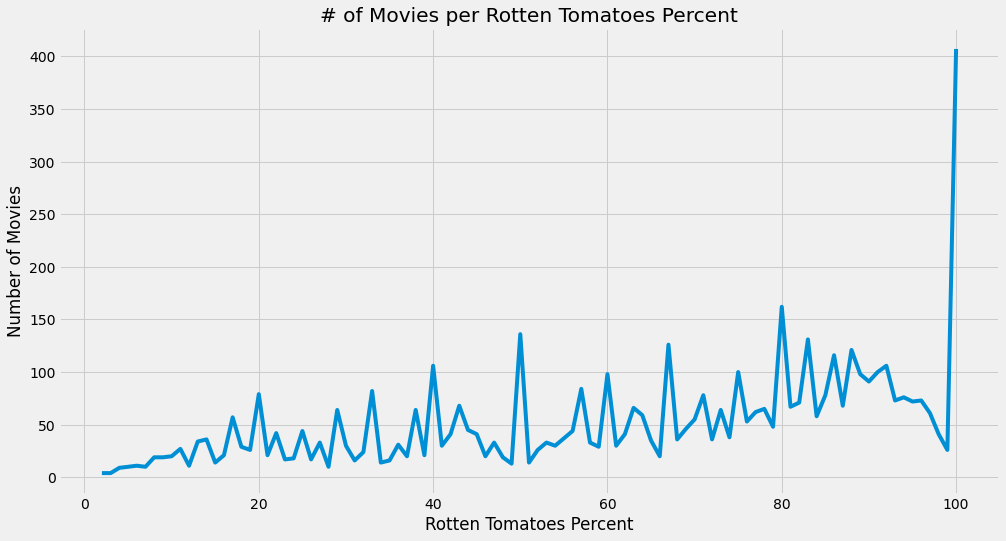

In [7]:
rotten_tomatoes_df = rotten_tomatoes_df.groupby(by='Rotten Tomatoes', as_index=False).agg({'ID': pd.Series.nunique}).rename(columns={'ID': 'Count'})
# Plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=FIGURE_SIZE)
plt.plot(rotten_tomatoes_df.loc[:, 'Rotten Tomatoes'].values, rotten_tomatoes_df.loc[:, 'Count'].values)
plt.xlabel("Rotten Tomatoes Percent")
plt.ylabel("Number of Movies")
plt.title("# of Movies per Rotten Tomatoes Percent")

<ipython-input-8-b04c08f8f45d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RottenTomatoesScore['Rotten Tomatoes'] = RottenTomatoesScore['Rotten Tomatoes'].str[:-1].astype(int)


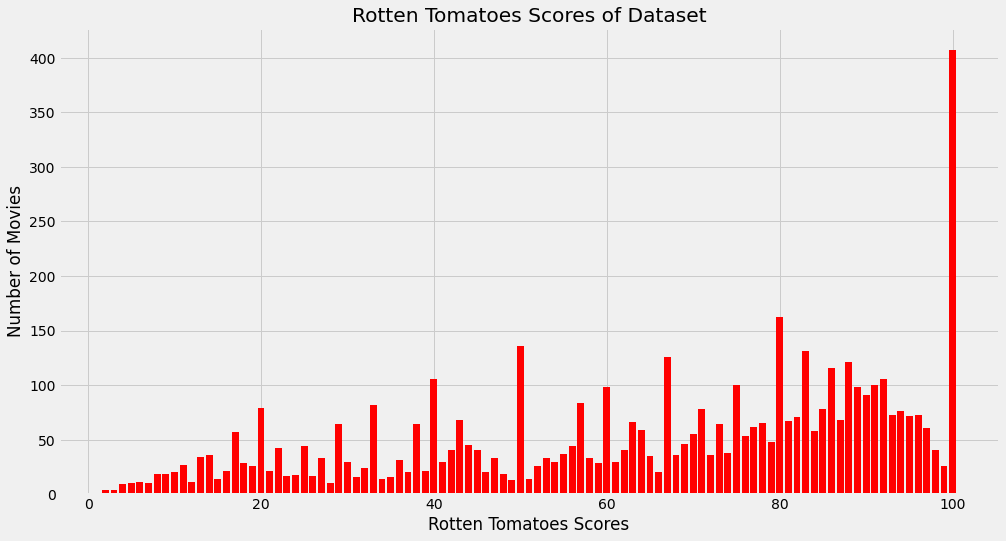

In [8]:
titles = pd.unique(df['Title'])
RottenTomatoesScore = df[df['Rotten Tomatoes'].notnull()]
RottenTomatoesScore['Rotten Tomatoes'] = RottenTomatoesScore['Rotten Tomatoes'].str[:-1].astype(int)
RottenTomatoesScore = RottenTomatoesScore.groupby(by='Rotten Tomatoes', as_index=False).agg({'ID': pd.Series.nunique}).rename(columns={'ID': 'Count'})


# RottenTomatoesScore = [str(df.loc[df['Title'] == title, 'RottenTomatoes'].values[0])[:-1] for title in titles]
# ids = [i for i in range(len(RottenTomatoesScore))]

plt.style.use('fivethirtyeight')
plt.figure(figsize=FIGURE_SIZE)
plt.bar(RottenTomatoesScore['Rotten Tomatoes'].values, RottenTomatoesScore['Count'].values, color="red")
plt.title("Rotten Tomatoes Scores of Dataset")
plt.xlabel("Rotten Tomatoes Scores")
plt.ylabel("Number of Movies")
plt.show()

<ipython-input-9-df56eeac5a0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_tomatoes_df['Rotten Tomatoes'] = rotten_tomatoes_df['Rotten Tomatoes'].apply(lambda x: int(x[:-1]))


Text(0.5, 1.0, 'Percentage of Movies per Rotten Tomatoes %')

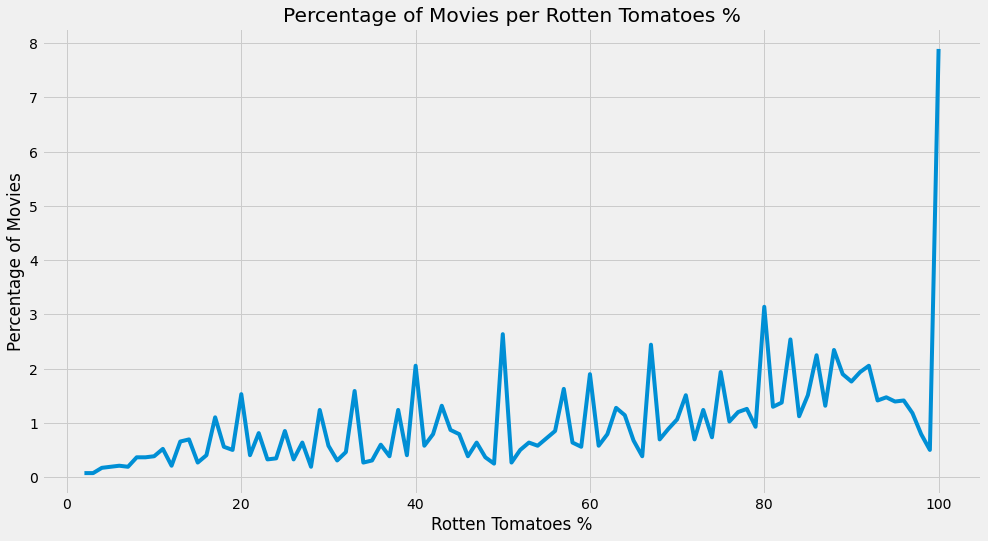

In [9]:
# Rest rotten_tomatoes_df
rotten_tomatoes_df = df.loc[df['Rotten Tomatoes'].notnull(), :]
rotten_tomatoes_df['Rotten Tomatoes'] = rotten_tomatoes_df['Rotten Tomatoes'].apply(lambda x: int(x[:-1]))

rotten_tomatoes_df = rotten_tomatoes_df.groupby(by='Rotten Tomatoes', as_index=False).agg({'ID': pd.Series.nunique}).rename(columns={'ID': 'Count'})
rotten_tomatoes_df[['Count']] = rotten_tomatoes_df[['Count']].div(rotten_tomatoes_df['Count'].sum()).multiply(100)

plt.style.use('fivethirtyeight')
plt.figure(figsize=FIGURE_SIZE)
plt.plot(rotten_tomatoes_df.loc[:, 'Rotten Tomatoes'].values, rotten_tomatoes_df.loc[:, 'Count'].values)
plt.xlabel("Rotten Tomatoes %")
plt.ylabel("Percentage of Movies")
plt.title("Percentage of Movies per Rotten Tomatoes %")

<ipython-input-49-8d552f2119c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rotten Tomatoes'] = new_df['Rotten Tomatoes'].str[:-1].astype(int)
<ipython-input-49-8d552f2119c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Rotten Tomatoes'] = new_df['Rotten Tomatoes'].str[:-1].astype(int)
<ipython-input-49-8d552f2119c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Text(0.5, 1.0, 'Percentage of Movies per Rotten Tomatoes %')

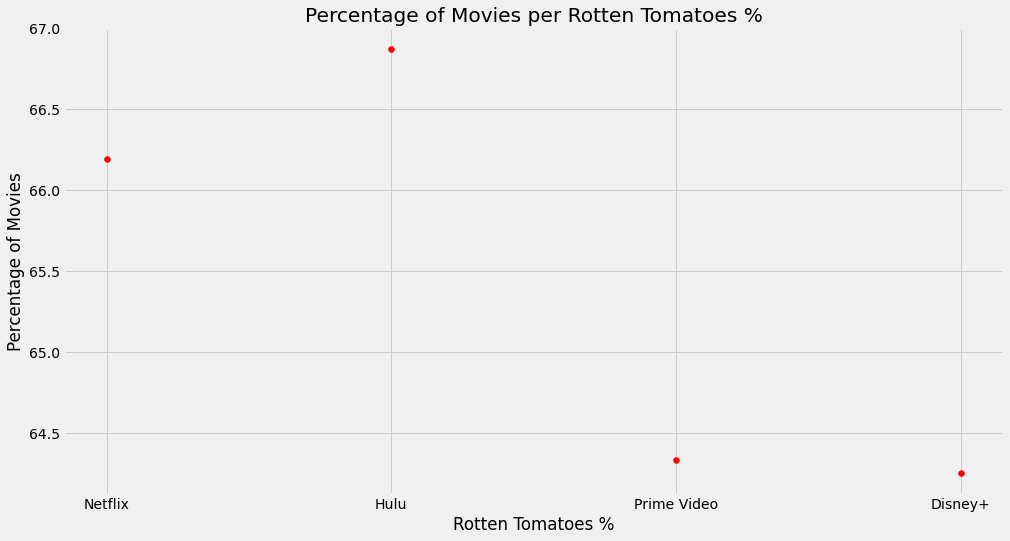

In [49]:
scores = []

def getMeanForStreamingService(streaming_service):
    new_df = df.loc[(df['Rotten Tomatoes'].notnull()) & (df[streaming_service] == 1), :]
    new_df['Rotten Tomatoes'] = new_df['Rotten Tomatoes'].str[:-1].astype(int)
    return new_df['Rotten Tomatoes'].mean()

# Find all valid netflix movies with rotten tomatoes
scores.append(getMeanForStreamingService('Netflix'))
scores.append(getMeanForStreamingService('Hulu'))
scores.append(getMeanForStreamingService('Prime Video'))
scores.append(getMeanForStreamingService('Disney+'))


plt.style.use('fivethirtyeight')
plt.figure(figsize=FIGURE_SIZE)
plt.scatter(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], scores, color="red")
plt.xlabel("Rotten Tomatoes %")
plt.ylabel("Percentage of Movies")
plt.title("Percentage of Movies per Rotten Tomatoes %")